In [20]:
from matplotlib import font_manager
f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [21]:
from matplotlib import rc
rc('font', family = 'Arial Unicode MS')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 세계 건강,보건 지표를 통해 세상 바라보기 (인도 유아사망율 중심으로)

In [23]:
from glob import glob
import pandas as pd

#세계 보건-헬스관련 자료를 합침

dfs=[]
file_list = glob('./EDA_data/1. health/*.csv')
for each_file in file_list:
    df = pd.read_csv(each_file)
    dfs.append(df)
    
df = pd.concat(dfs)
df['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN',
       'ISR', 'RUS', 'SVN', 'ZAF', 'COL', 'LVA', 'LTU', 'CRI', 'G7M',
       'AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AZE', 'BHR', 'BGD',
       'BLR', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAF', 'TCD', 'COG', 'CIV', 'HRV', 'CUB',
       'CYP', 'PRK', 'COD', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'ETH', 'FJI', 'GAB', 'GMB', 'GEO', 'GHA', 'GTM', 'GIN', 'GNB',
       'HTI', 'HND', 'HKG', 'IRN', 'IRQ', 'JAM', 'JOR', 'KAZ', 'KEN',
       'KWT', 'KGZ', 'LAO', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'MKD',
       'MDG', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS', 'MDA', 'MNG',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NIC', 'NER', 'NGA', 'OMN',
       'PAK', 'PAN',

In [24]:
#모든 나라 중 인도 자료만 뽑아 보기

df_total_ind = df[df['LOCATION'] =='IND']
df_total_ind.reset_index(drop = True, inplace = True)
df_total_ind['INDICATOR'].unique()

array(['ALCOHOL', 'HOSPITALBED', 'MEDICALDOC', 'CHILDVACCIN',
       'POLLUTIONEXP', 'LIFEEXP', 'INFANTMORTALITY'], dtype=object)

In [25]:
#2017년도 세계 지표만 정리해 보기

df_2017 = df[df['TIME'] == 2017]
df_2017.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
57,AUS,ALCOHOL,TOT,LT_CAP15,A,2017,9.5,NaN
115,AUT,ALCOHOL,TOT,LT_CAP15,A,2017,12.1,NaN
171,BEL,ALCOHOL,TOT,LT_CAP15,A,2017,9.4,NaN
230,CAN,ALCOHOL,TOT,LT_CAP15,A,2017,8.2,NaN
269,CZE,ALCOHOL,TOT,LT_CAP15,A,2017,11.6,D


In [26]:
#SUBJECT의 평균을 구해줌

df_2017 = pd.DataFrame(df_2017.groupby(['LOCATION', 'INDICATOR']).mean())
df_2017.reset_index(inplace=True)
df_2017

,LOCATION,INDICATOR,TIME,Value
0,AFG,POLLUTIONEXP,2017,78.984295
1,AGO,POLLUTIONEXP,2017,66.254160
2,ALB,POLLUTIONEXP,2017,58.818040
3,ARE,POLLUTIONEXP,2017,70.042080
4,ARG,POLLUTIONEXP,2017,55.119270
...,...,...,...,...
404,ZAF,INFANTMORTALITY,2017,29.600000
405,ZAF,LIFEEXP,2017,63.633333
406,ZAF,POLLUTIONEXP,2017,62.459445
407,ZMB,POLLUTIONEXP,2017,63.872210


In [27]:
# 한국만 뽑아 봄
df_kor = df_2017[df_2017["LOCATION"] == 'KOR']
df_kor = df_kor.sort_values('Value', ascending = False )
df_kor['Value'] = round(df_kor['Value'], 2)
df_kor.reset_index(drop =True, inplace = True)
df_kor

,LOCATION,INDICATOR,TIME,Value
0,KOR,CHILDVACCIN,2017,97.40
1,KOR,LIFEEXP,2017,82.70
2,KOR,POLLUTIONEXP,2017,62.19
3,KOR,ALCOHOL,2017,8.70
4,KOR,HOSPITALBED,2017,6.91
5,KOR,INFANTMORTALITY,2017,2.80
6,KOR,MEDICALDOC,2017,2.34


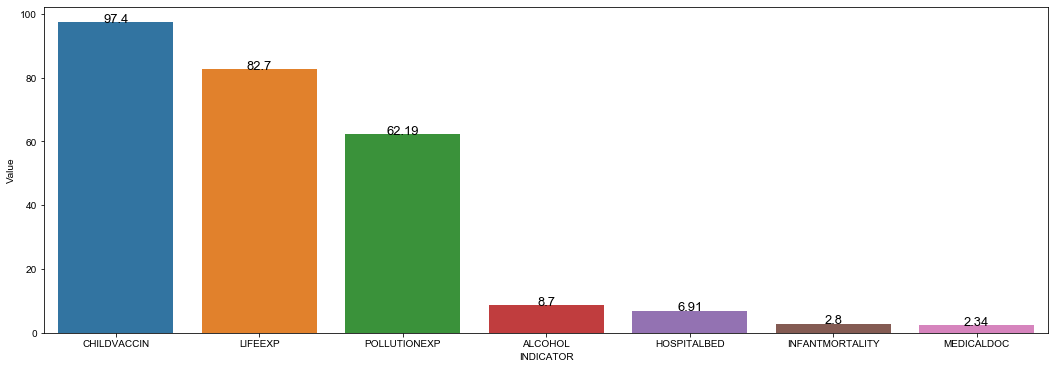

In [28]:
#한국 건강관련 영역을 그래프로 그려 봄

plt.figure(figsize=(18,6))
ind= sns.barplot(x= 'INDICATOR', y='Value', data = df_kor)
for i in range(df_kor.shape[0]):
    ind.text(x=i, y = df_kor['Value'][i], s=df_kor['Value'][i],fontsize=13, horizontalalignment='center')


In [29]:
#알콜 소비량을 뽑아 봄

df_alcohol= df_2017[df_2017["INDICATOR"] =='ALCOHOL']
df_alcohol = df_alcohol.sort_values(by ='Value', ascending = False)

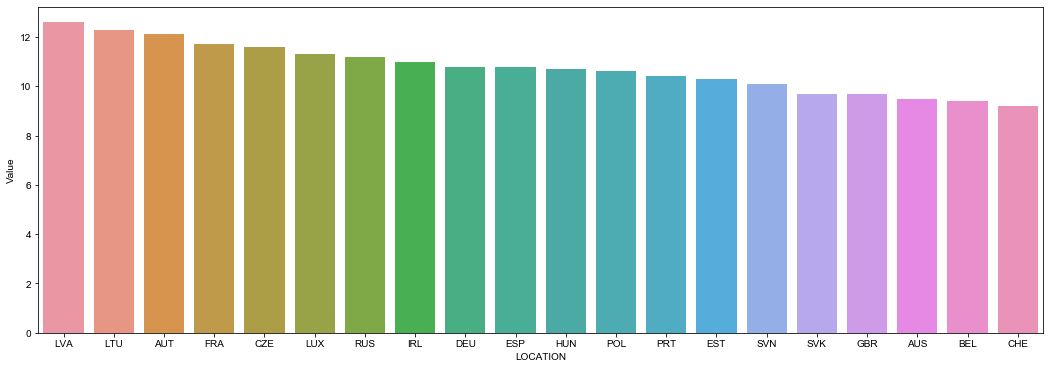

In [30]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_alcohol[:20])

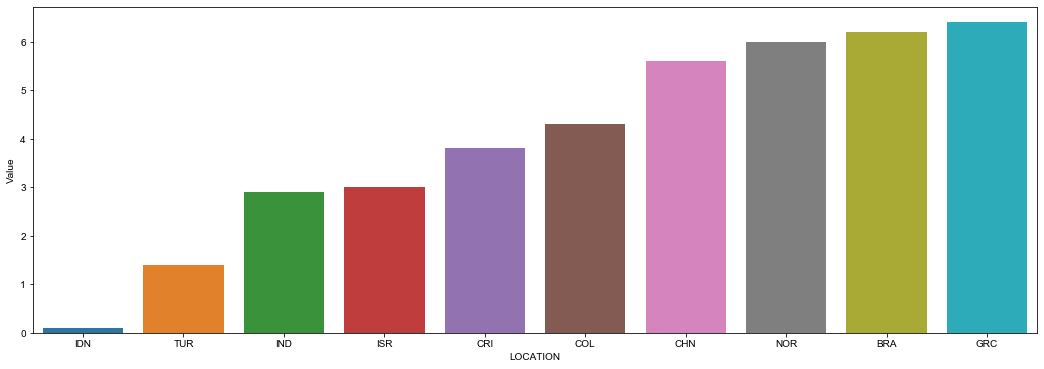

In [31]:
#알콜소비량을 반대로 뽑아봄

plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_alcohol[::-1][:10]);

#알콜 소비량은 하위권으로 나타남(종교적인 영향) 그렇다면 먹는거 중에 인도가 꼴찌인 것은 무엇일까? 이유는?

In [32]:
# 고기소비량만 따로 뽑아 봄

df_meat = pd.read_csv('./EDA_data/meat_2017.csv')
df_meat = df_meat[['LOCATION','SUBJECT','TIME','Value']]

# df_meat = pd.DataFrame(df_meat.pivot_table('Value','LOCATION','SUBJECT'))

df_meat.tail()
# df_meat.reset_index(inplace = True)
# df_meat
# df_meat = df_meat.sort_values(by =['BEEF',"PIG",'POULTRY','SHEEP'], ascending = False)
# df_meat
# df_meat = df_meat.columns.droplevel([0,1])

# df_meat_ind = df_meat[(df_meat['LOCATION'] =='IND') & (df_meat['TIME'] ==2017)]
# df_meat_ind

,LOCATION,SUBJECT,TIME,Value
135,CHE,SHEEP,2017,1.203
136,GBR,BEEF,2017,11.706
137,GBR,PIG,2017,16.626
138,GBR,POULTRY,2017,27.048
139,GBR,SHEEP,2017,4.030


In [33]:
df_meat_pivot = pd.DataFrame(df_meat.pivot_table('Value','LOCATION','SUBJECT'))
df_meat_pivot['Total'] = df_meat_pivot["BEEF"] + df_meat_pivot['PIG'] + df_meat_pivot['POULTRY'] + df_meat_pivot['SHEEP']
df_meat_pivot = df_meat_pivot.sort_values(by = 'Total', ascending = False)
df_meat_pivot.head()

SUBJECT,BEEF,PIG,POULTRY,SHEEP,Total
LOCATION,,,,,
USA,25.939,22.893,48.901,0.480,98.213
AUS,21.251,22.062,43.349,7.755,94.417
ISR,20.909,1.354,66.213,1.480,89.956
ARG,39.575,10.421,38.343,0.969,89.308
BRA,25.373,12.149,40.906,0.532,78.960


In [15]:
# 학원생들에게 물어봅니다. 당신은 소고기 좋아하는 사람 손? 돼지고기 좋아하는 사람 손? 닭고기 좋아하는 사람 손? 양고기 먹으러 가는 사람 손?

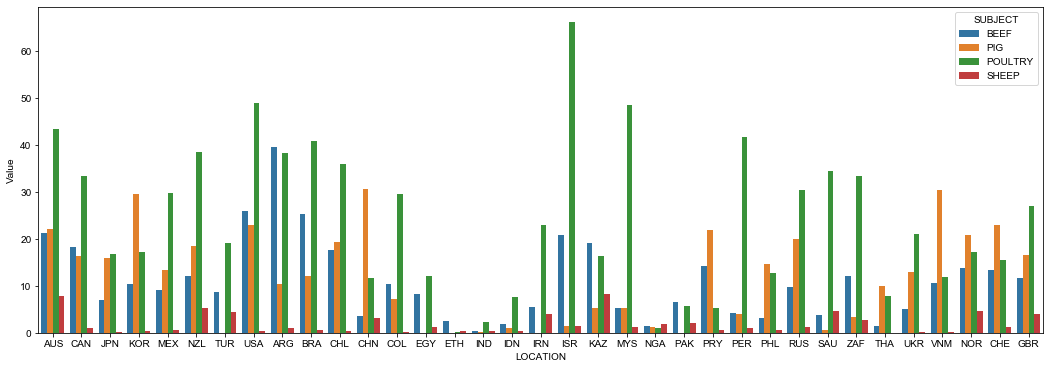

In [16]:
plt.figure(figsize=(18,6))
sns.barplot(x ='LOCATION', y ="Value", hue = 'SUBJECT', data = df_meat);

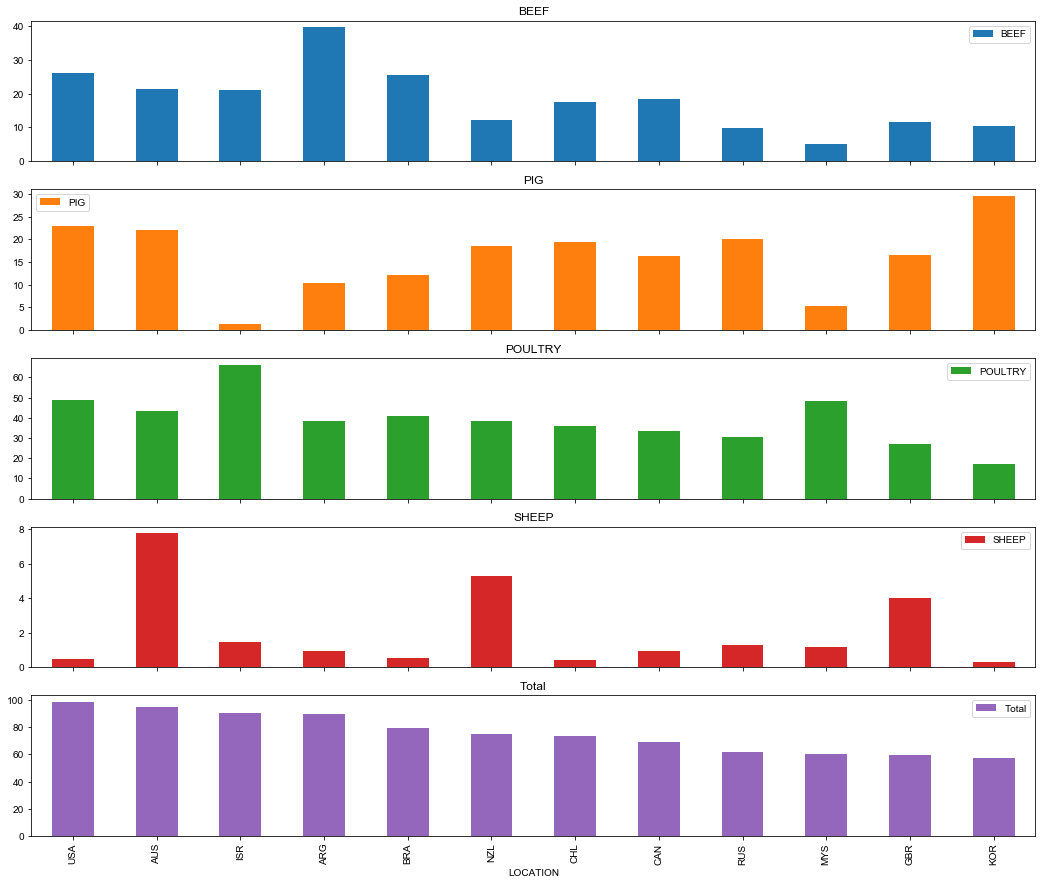

In [17]:
# plt.figure(figsize=(18,6))

df_meat_pivot[:12].plot(kind='bar',subplots=True, figsize=(18,15));

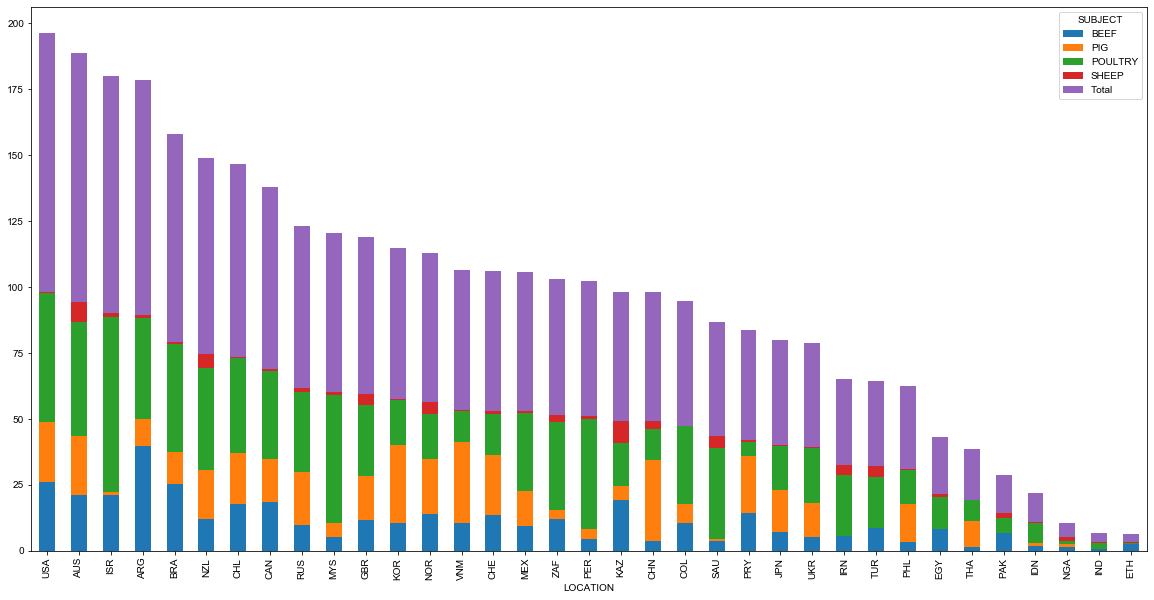

In [18]:
df_meat_pivot.plot(kind='bar', stacked = True, figsize=(20,10))

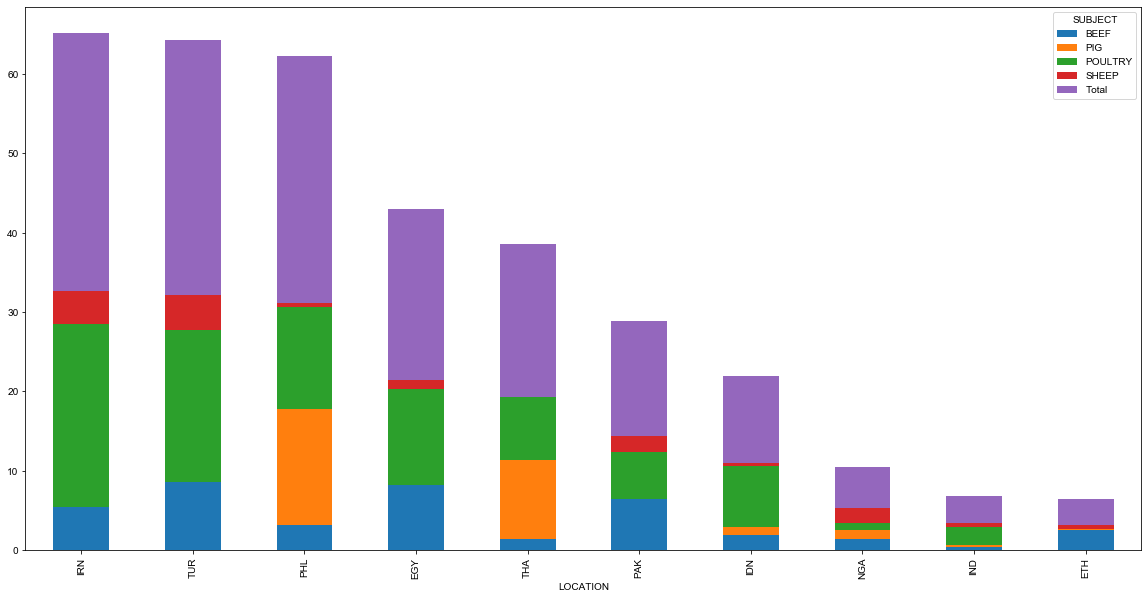

In [19]:
df_meat_pivot[-10:].plot(kind='bar', stacked = True, figsize=(20,10));

#고기 소비량 하위권

In [20]:
# 유아사망율을 뽑아 봄

df_infant= df_2017[df_2017["INDICATOR"] =='INFANTMORTALITY']
df_infant = df_infant.sort_values(by ='Value', ascending = False)
df_infant['lat'] = [28.35, -30.5595, -0.7893,23.6345, -14.235, 38.9637, 40.1824, 9.7489, -35.6751 ,42.25748406,
                   61.52401,53.9333,48.669, 56.8796, 51.9194,46.2276, 55.3781, 56.2639, 52.1326, 50.8333, 39.0742,
                   47.1625, 46.8182, -35.4735, 51.165691, 49.8153, 31.046051, 53.1424, 55.1694, 47.5162, 35.90775700000000,
                   31.046051, 49.8175, 39.3999, 40.463667, 41.87194, 60.128161, 58.5953,60.472,46.1512, 61.92411, 36.204824 ]
df_infant['long'] = [77.12, 22.9375, 113.9213,-102.5528, -51.9253, 35.2433, 116.4142, -83.7534, -71.543, -78.02750466,
                    105.318756, -116.5765, 19.699, 24.6032, 19.1451, 2.2137, -3.4360, 9.5018, 5.2913, 4.469936, 21.8243,
                    19.5033, 8.2275, 149.0124, 10.451526, 6.1296, 34.851612, -7.6921, 23.8813, 14.5501, 127.766922,
                    34.851612, 15.473, -8.2245, -3.74922, 12.56738, 18.643501, 25.0136, 8.4689, 46.1512, 25.748151, 138.252924] 
df_infant.head()

,LOCATION,INDICATOR,TIME,Value,lat,long
183,IND,INFANTMORTALITY,2017,31.5,28.3500,77.1200
404,ZAF,INFANTMORTALITY,2017,29.6,-30.5595,22.9375
177,IDN,INFANTMORTALITY,2017,21.9,-0.7893,113.9213
271,MEX,INFANTMORTALITY,2017,13.5,23.6345,-102.5528
37,BRA,INFANTMORTALITY,2017,13.2,-14.2350,-51.9253


In [21]:
from IPython.display import display
m = folium.Map()
for n in df_infant.index:
    folium.CircleMarker([df_infant['lat'][n], df_infant['long'][n]], radius = int(df_infant['Value'][n])
    , color='red', fill="True", fill_color='red', popup=df_infant['LOCATION'][n] + ":" + str(df_infant['Value'][n])).add_to(m)
display(m)

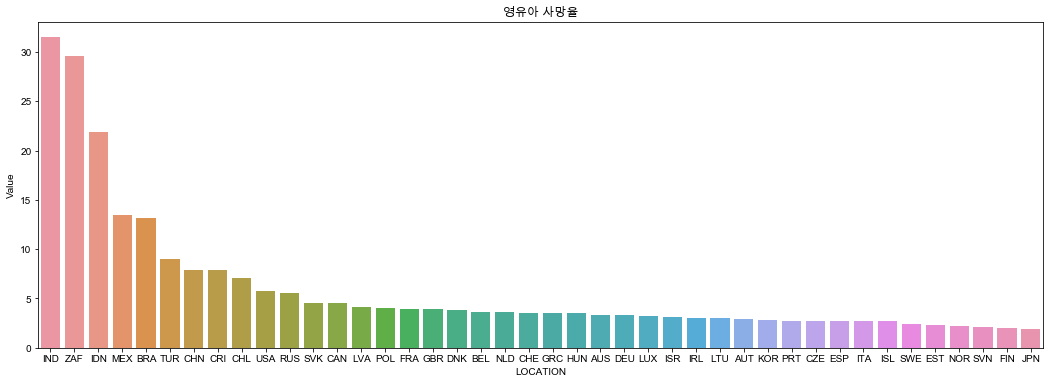

In [22]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_infant)
plt.title("영유아 사망율");

#인도의 유아사망율이 가장 높음

In [55]:
# 더 깊숙히 들어가 보고자 인도의 헬스관련 자료를 탐색함
df_ind = df_2017[df_2017["LOCATION"] == 'IND']
df_ind = df_ind.sort_values('Value', ascending= False)
df_ind['Value'] = round(df_ind['Value'], 2)
df_ind.reset_index(drop=True, inplace = True)
df_ind

,LOCATION,INDICATOR,TIME,Value
0,IND,POLLUTIONEXP,2017,95.09
1,IND,CHILDVACCIN,2017,89.00
2,IND,LIFEEXP,2017,69.20
3,IND,INFANTMORTALITY,2017,31.50
4,IND,ALCOHOL,2017,2.90
5,IND,MEDICALDOC,2017,0.78
6,IND,HOSPITALBED,2017,0.53


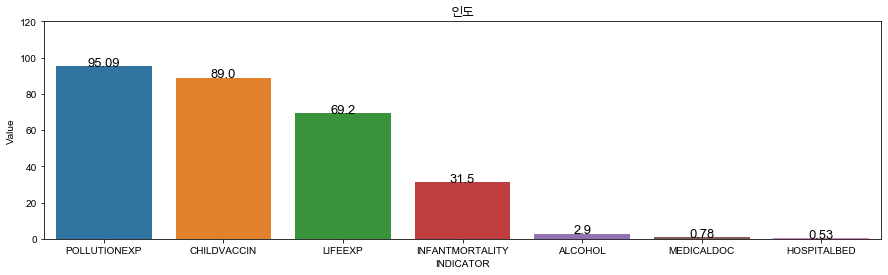

In [56]:
plt.figure(figsize=(15,4))
ind = sns.barplot(x= 'INDICATOR', y='Value', data = df_ind)
for i in range(df_ind.shape[0]):
    ind.text(x=i, y = df_ind['Value'][i], s=df_ind['Value'][i],fontsize=13, horizontalalignment='center')
plt.ylim(0,120)
plt.title("인도");

# 알콜소비량은 적음(종교), 유아사망율과는 관계가 없을 것 같음
# 건강과 관련되 것 중에 기대수명, 1000명당 의사수-병상수, 유아 백신 접종율, 공기오염도는 다른 나라와 비교해보자!

In [25]:
#오염 노출정도

df_pol= df_2017[df_2017["INDICATOR"] =='POLLUTIONEXP']
df_pol = df_pol.sort_values(by ='Value', ascending = False)

In [26]:
df_pol.tail()

,LOCATION,INDICATOR,TIME,Value
124,EST,POLLUTIONEXP,2017,3.420995
50,CAN,POLLUTIONEXP,2017,3.229655
309,NZL,POLLUTIONEXP,2017,2.995905
132,FIN,POLLUTIONEXP,2017,2.953015
40,BRN,POLLUTIONEXP,2017,2.878510


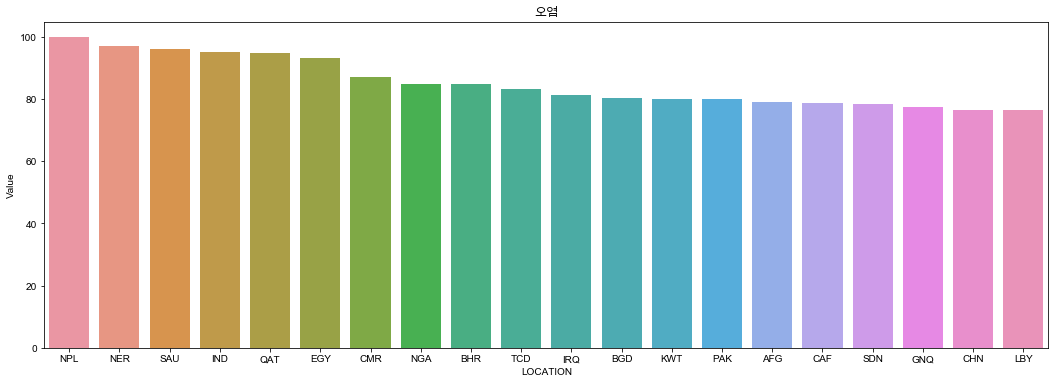

In [27]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_pol[:20])
plt.title("오염");
#인도가 4위(총 169 개국)


In [28]:
#1000명당 의사수

df_doc= df_2017[df_2017["INDICATOR"] =='MEDICALDOC']
df_doc = df_doc.sort_values(by ='Value', ascending = False)

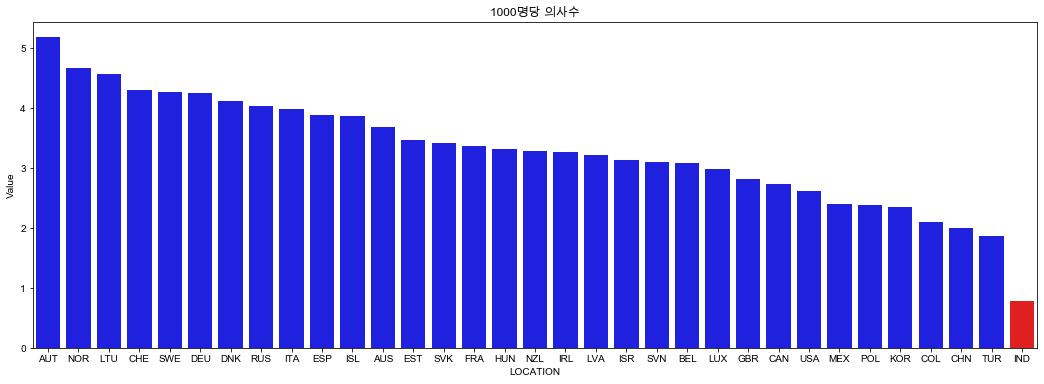

In [29]:

plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_doc, palette=["r" if x =='IND' else "b" for x in df_doc['LOCATION']])
plt.title("1000명당 의사수");
#인도 꼴찌

In [30]:
# 1000명당 병상수를 출력해 봄

In [31]:
df_bed= df_2017[df_2017["INDICATOR"] =='HOSPITALBED']
df_bed = df_bed.sort_values(by ='Value', ascending = False)

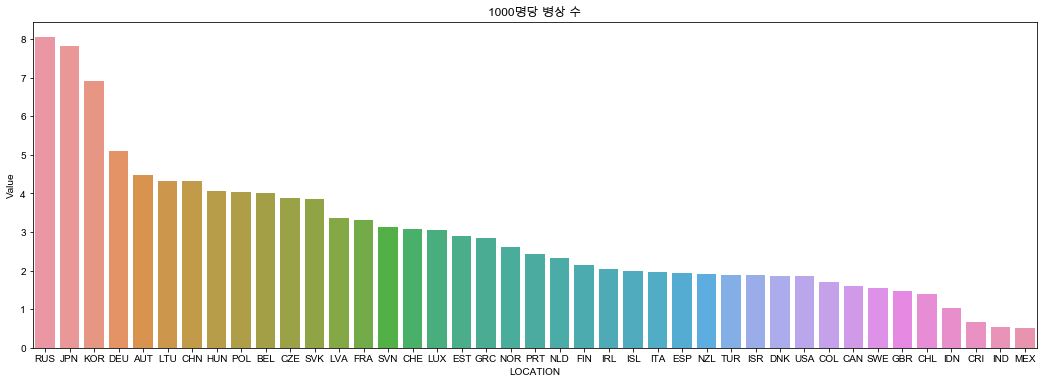

In [32]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_bed)
plt.title("1000명당 병상 수");

#꼴지에서 두번째

In [33]:
# 어린이 백신접종율을 뽑아봄
df_vacc= df_2017[df_2017["INDICATOR"] =='CHILDVACCIN']
df_vacc = df_vacc.sort_values(by ='Value', ascending = False)
df_vacc.head()


,LOCATION,INDICATOR,TIME,Value
169,HUN,CHILDVACCIN,2017,99.9
220,JPN,CHILDVACCIN,2017,99.0
158,GRC,CHILDVACCIN,2017,99.0
252,LUX,CHILDVACCIN,2017,99.0
259,LVA,CHILDVACCIN,2017,98.1


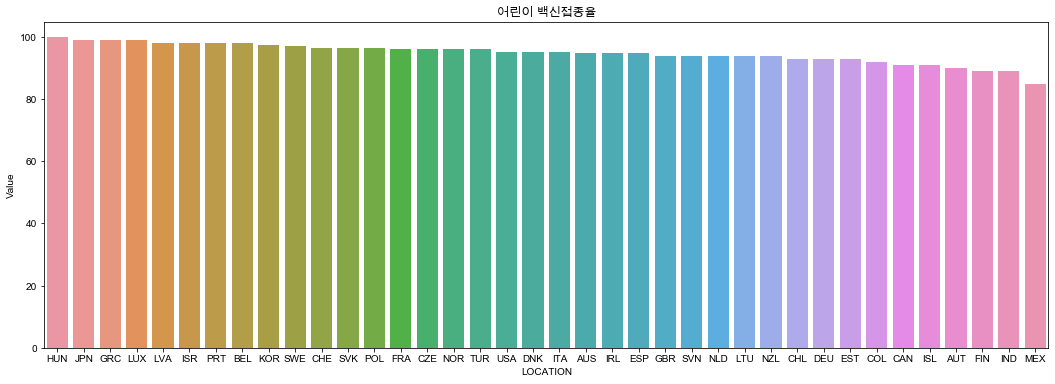

In [34]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_vacc)
plt.title("어린이 백신접종율");

#역시나 낮음

In [35]:
# 기대수명을 뽑아봄
df_life= df_2017[df_2017["INDICATOR"] =='LIFEEXP']
df_life = df_life.sort_values(by ='Value', ascending = False)

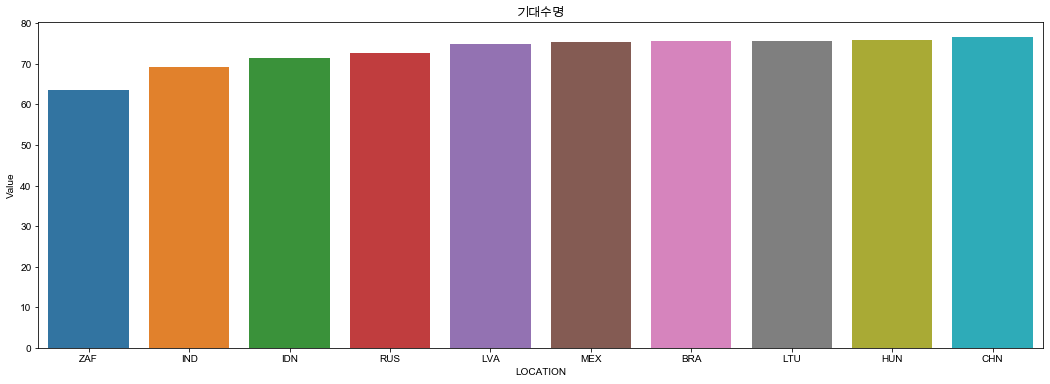

In [36]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_life[::-1][:10])
plt.title("기대수명");

# 뒤에서 두번째

In [37]:
# 인도의 상관관계 분석 해봄

In [38]:
from sklearn import preprocessing

In [39]:
df_total_ind= df_total_ind[['TIME','LOCATION','INDICATOR','Value']]

df_total_ind_tr = df_total_ind.pivot_table(index = 'TIME', columns = 'INDICATOR', values = 'Value')

df_total_ind['Value_minmax'] = preprocessing.minmax_scale(df_total_ind["Value"])
df_total_ind.head()

,TIME,LOCATION,INDICATOR,Value,Value_minmax
0,1961,IND,ALCOHOL,0.7,0.001801
1,1962,IND,ALCOHOL,0.7,0.001801
2,1963,IND,ALCOHOL,0.6,0.001180
3,1964,IND,ALCOHOL,0.7,0.001801
4,1965,IND,ALCOHOL,0.6,0.001180


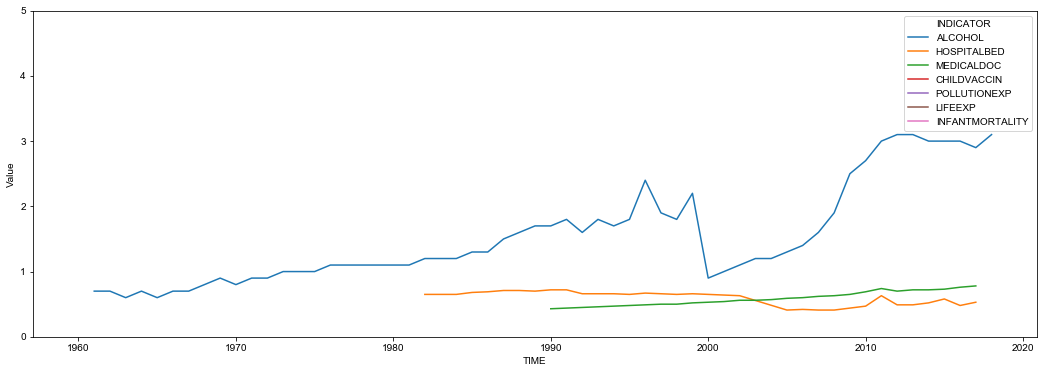

In [40]:
plt.figure(figsize=(18,6))

sns.lineplot(x = 'TIME', y = "Value",hue= 'INDICATOR', data= df_total_ind)
plt.ylim(0,5);

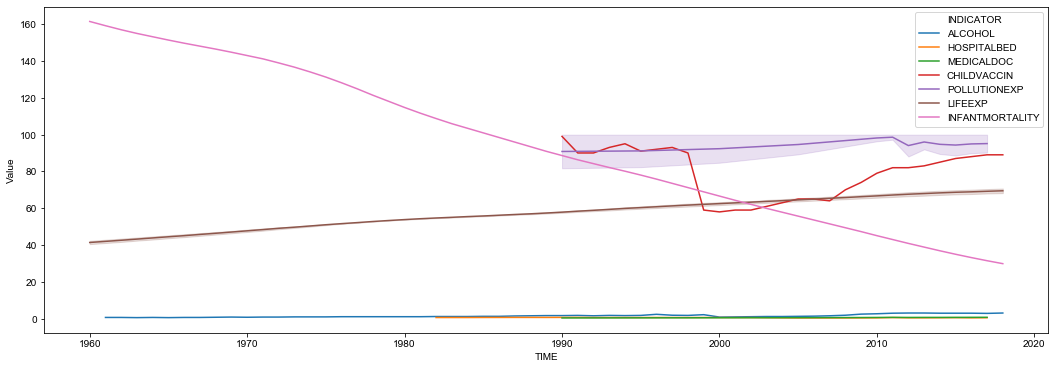

In [41]:
plt.figure(figsize=(18,6))

sns.lineplot(x = 'TIME', y = "Value",hue= 'INDICATOR', data= df_total_ind);

# 근데....왜 동일하게 뚝 떨어지는 두 지점(알코올 소비량, 유아백신 접종율)이 발생할까?

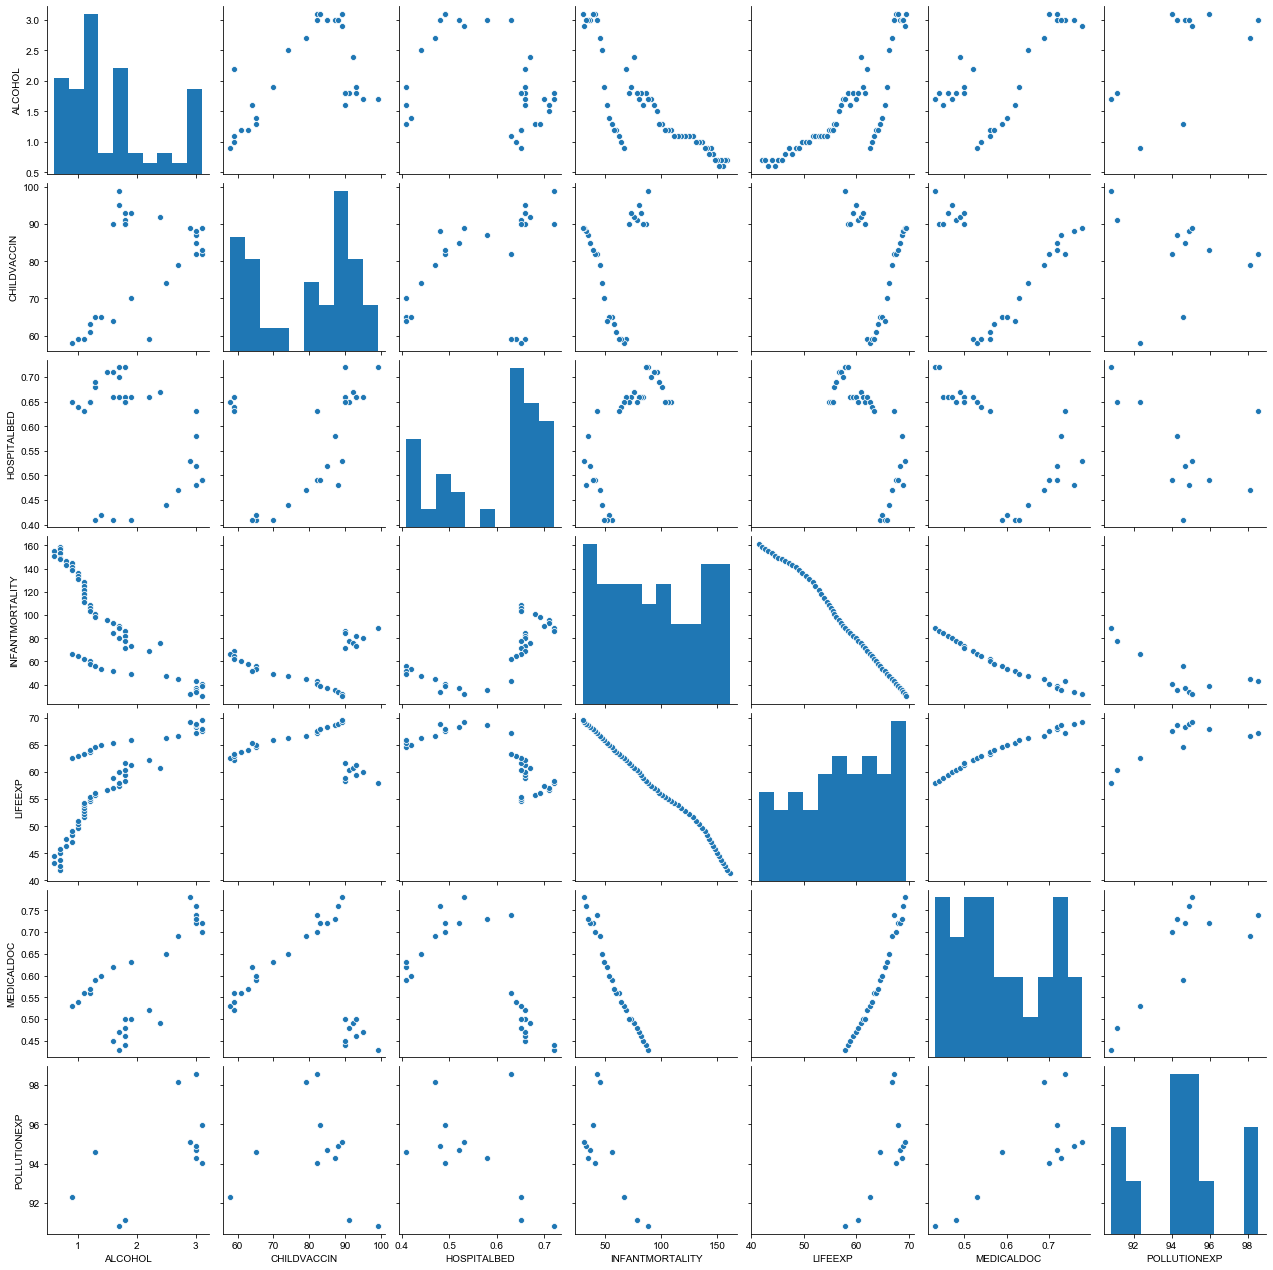

In [42]:
# pairplot으로 상관관계를 봄

sns.pairplot(df_total_ind_tr);

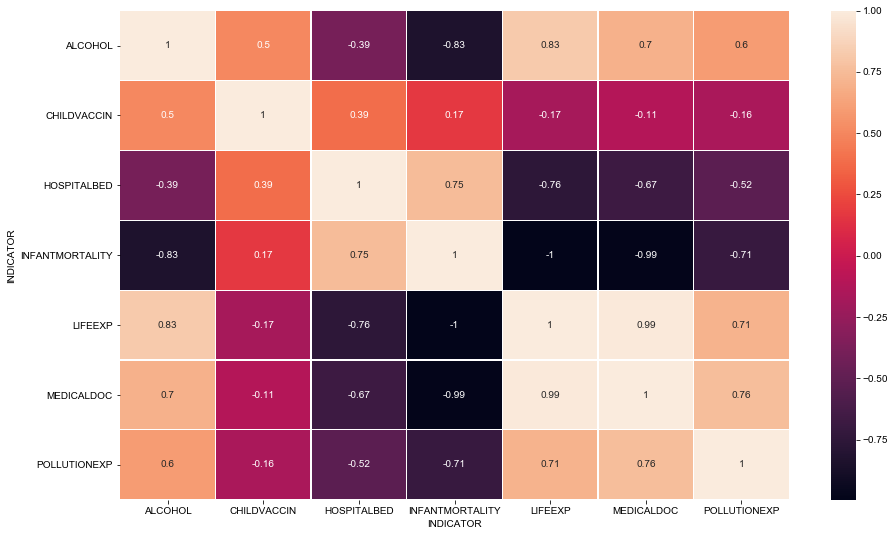

In [43]:
#히트맵으로 상관관계를 봄
sns.color_palette("magma", 10)

plt.figure(figsize=(15,9))
sns.heatmap(df_total_ind_tr.corr(), linewidths=0.1,
            linecolor='white', annot=True);

In [44]:
### 기대수명, 의사수, 대기오염 노출은 지속적으로 증가하고 있으며 영유아 사망율은 감소하고 있음.
### 인도의 병상수는 증감이 지속적으로 나타나 상관관계가 확실히 나오지 않음
### 유아사망율과 기대수명은 큰 상관관계를 가짐(0세부터 계산되기 때문에)
### 인도의 유아사망율 중에 가장 높은 이유가 폐렴이라고 함(호흡기 질환)

In [45]:
df_pop = pd.read_csv('./EDA_data/pop.csv')
df_pop = df_pop[['LOCATION','SUBJECT', 'TIME', 'Value']]
df_pop[df_pop['SUBJECT'] == 'TOT'].tail()

,LOCATION,SUBJECT,TIME,Value
671,BGR,TOT,2014,7.223938
672,BGR,TOT,2015,7.177991
673,BGR,TOT,2016,7.127822
674,BGR,TOT,2017,7.075947
675,BGR,TOT,2018,7.025037


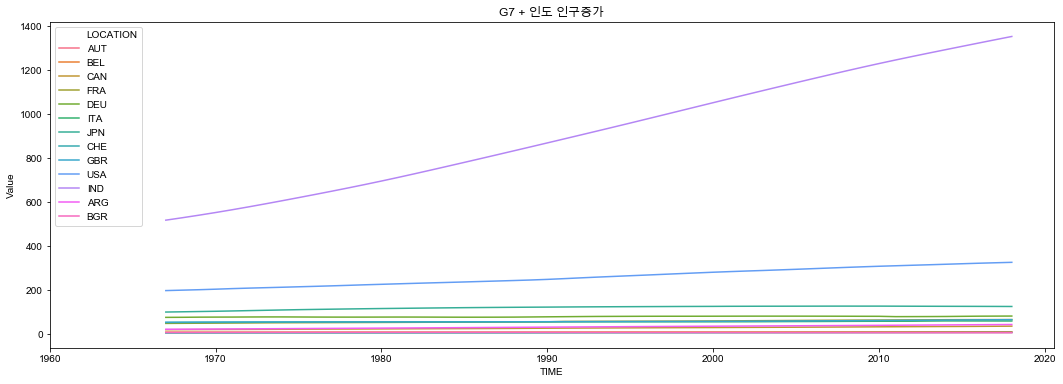

In [46]:
plt.figure(figsize=(18,6))
plt.title("G7 + 인도 인구증가")
sns.lineplot(x = 'TIME', y = "Value",hue= 'LOCATION', data= df_pop)
plt.xlim(1960);

In [47]:
## 인가증가율은 월등히 늘어나고 있지만 보건쪽은 다른 국가보다 성장이 더딤